In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Summary of weather.csv')

C:\Users\tenth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [5]:
print(df.columns)

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')


## 1. Dropped unwanted columns

In [6]:
df.drop(['WindGustSpd','Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
  axis='columns', inplace=True)

In [7]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889
1,10001,1942-7-2,0,28.888889,21.666667,25.555556
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444
4,10001,1942-7-5,0,26.666667,21.666667,24.444444


In [8]:
df.drop('Precip',axis='columns', inplace=True)

In [9]:
df.head()

,STA,Date,MaxTemp,MinTemp,MeanTemp
0,10001,1942-7-1,25.555556,22.222222,23.888889
1,10001,1942-7-2,28.888889,21.666667,25.555556
2,10001,1942-7-3,26.111111,22.222222,24.444444
3,10001,1942-7-4,26.666667,22.222222,24.444444
4,10001,1942-7-5,26.666667,21.666667,24.444444


## 2. Changing data type of 'Date' column from object to datetime

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.5+ MB


In [11]:
df['Date']= pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   MaxTemp   119040 non-null  float64       
 3   MinTemp   119040 non-null  float64       
 4   MeanTemp  119040 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 4.5 MB


## 3. Rounding off the decimals

In [13]:
df.round(decimals = 2)

,STA,Date,MaxTemp,MinTemp,MeanTemp
0,10001,1942-07-01,25.56,22.22,23.89
1,10001,1942-07-02,28.89,21.67,25.56
2,10001,1942-07-03,26.11,22.22,24.44
3,10001,1942-07-04,26.67,22.22,24.44
4,10001,1942-07-05,26.67,21.67,24.44
...,...,...,...,...,...
119035,82506,1945-12-27,28.33,18.33,23.33
119036,82506,1945-12-28,29.44,18.33,23.89
119037,82506,1945-12-29,28.33,18.33,23.33
119038,82506,1945-12-30,28.33,18.33,23.33


In [14]:
df.drop('STA',axis='columns', inplace=True)

In [18]:
df.head()

,Date,MaxTemp,MinTemp,MeanTemp
0,1942-07-01,25.555556,22.222222,23.888889
1,1942-07-02,28.888889,21.666667,25.555556
2,1942-07-03,26.111111,22.222222,24.444444
3,1942-07-04,26.666667,22.222222,24.444444
4,1942-07-05,26.666667,21.666667,24.444444


## 4. Data Visualization

In [15]:
import seaborn as sns

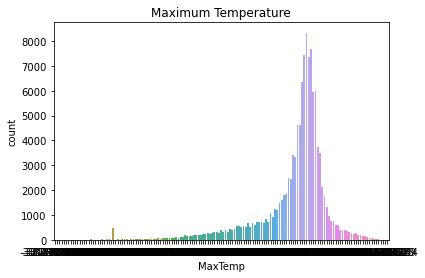

In [16]:
sns.countplot(x = 'MaxTemp',data = df)
plt.title('Maximum Temperature')
plt.show()

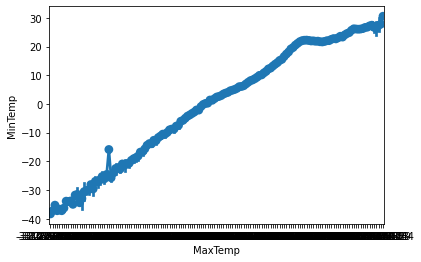

In [20]:
sns.pointplot(x="MaxTemp", y="MinTemp", data=df)
plt.show()

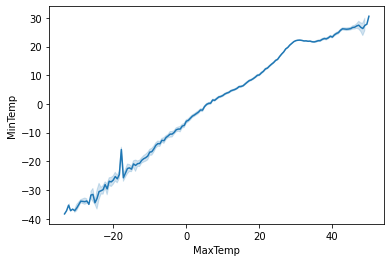

In [22]:
sns.lineplot(x="MaxTemp", y="MinTemp", data=df)
plt.show()

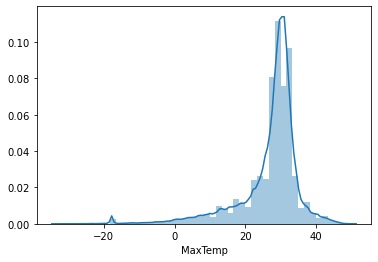

In [23]:
sns.distplot(df['MaxTemp'])